# Урок 6. Наивный байесовский классификатор

В уроке мы подробно рассмотрели, как работает наивный байесовский классификатор, на примере частотной таблицы. Такие данные на практике встречаются довольно редко (если вы не работаете с классификацией текстов), поэтому сейчас предлагаем самостоятельно разобрать принцип работы гауссовского наивного Байеса, который можно встретить чаще остальных.

### 1.
Посмотрите, что включает в себя новый датасет Wine, где собраны результаты химического анализа вин, выращенных в одном регионе Италии тремя различными культиваторами. В наборе каждый из объектов имеет 13 числовых признаков.

Изучите попарные графики признаков (в уроках мы рассматривали их с помощью функции pd.plotting.scatter_matrix() ) и выберите такие два признака, используя которые, на ваш взгляд, можно будет лучше всего разделить данные по трем классам. Помните о том, что модель гауссовского наивного Байеса использует для предсказаний среднее и разброс значений признаков относительно среднего, поэтому вероятнее всего, лучшими признаками будут те, значения которых на графике разбросаны примерно одинаково от среднего значения, но как можно меньше накладываются на признаки других классов.

*Примечание: для наглядности в параметрах функции построения графиков примените figsize=(25, 25) - это позволит отобразить график достаточного размера для того, чтобы его изучить.*

In [52]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

In [53]:
wine = load_wine()
print('Features:', wine.feature_names)
print('Targets names:', wine.target_names)
print('Target:', wine.target)

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Targets names: ['class_0' 'class_1' 'class_2']
Target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [54]:
ds_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
print(ds_wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB
None


In [55]:
ds_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [56]:
ds_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


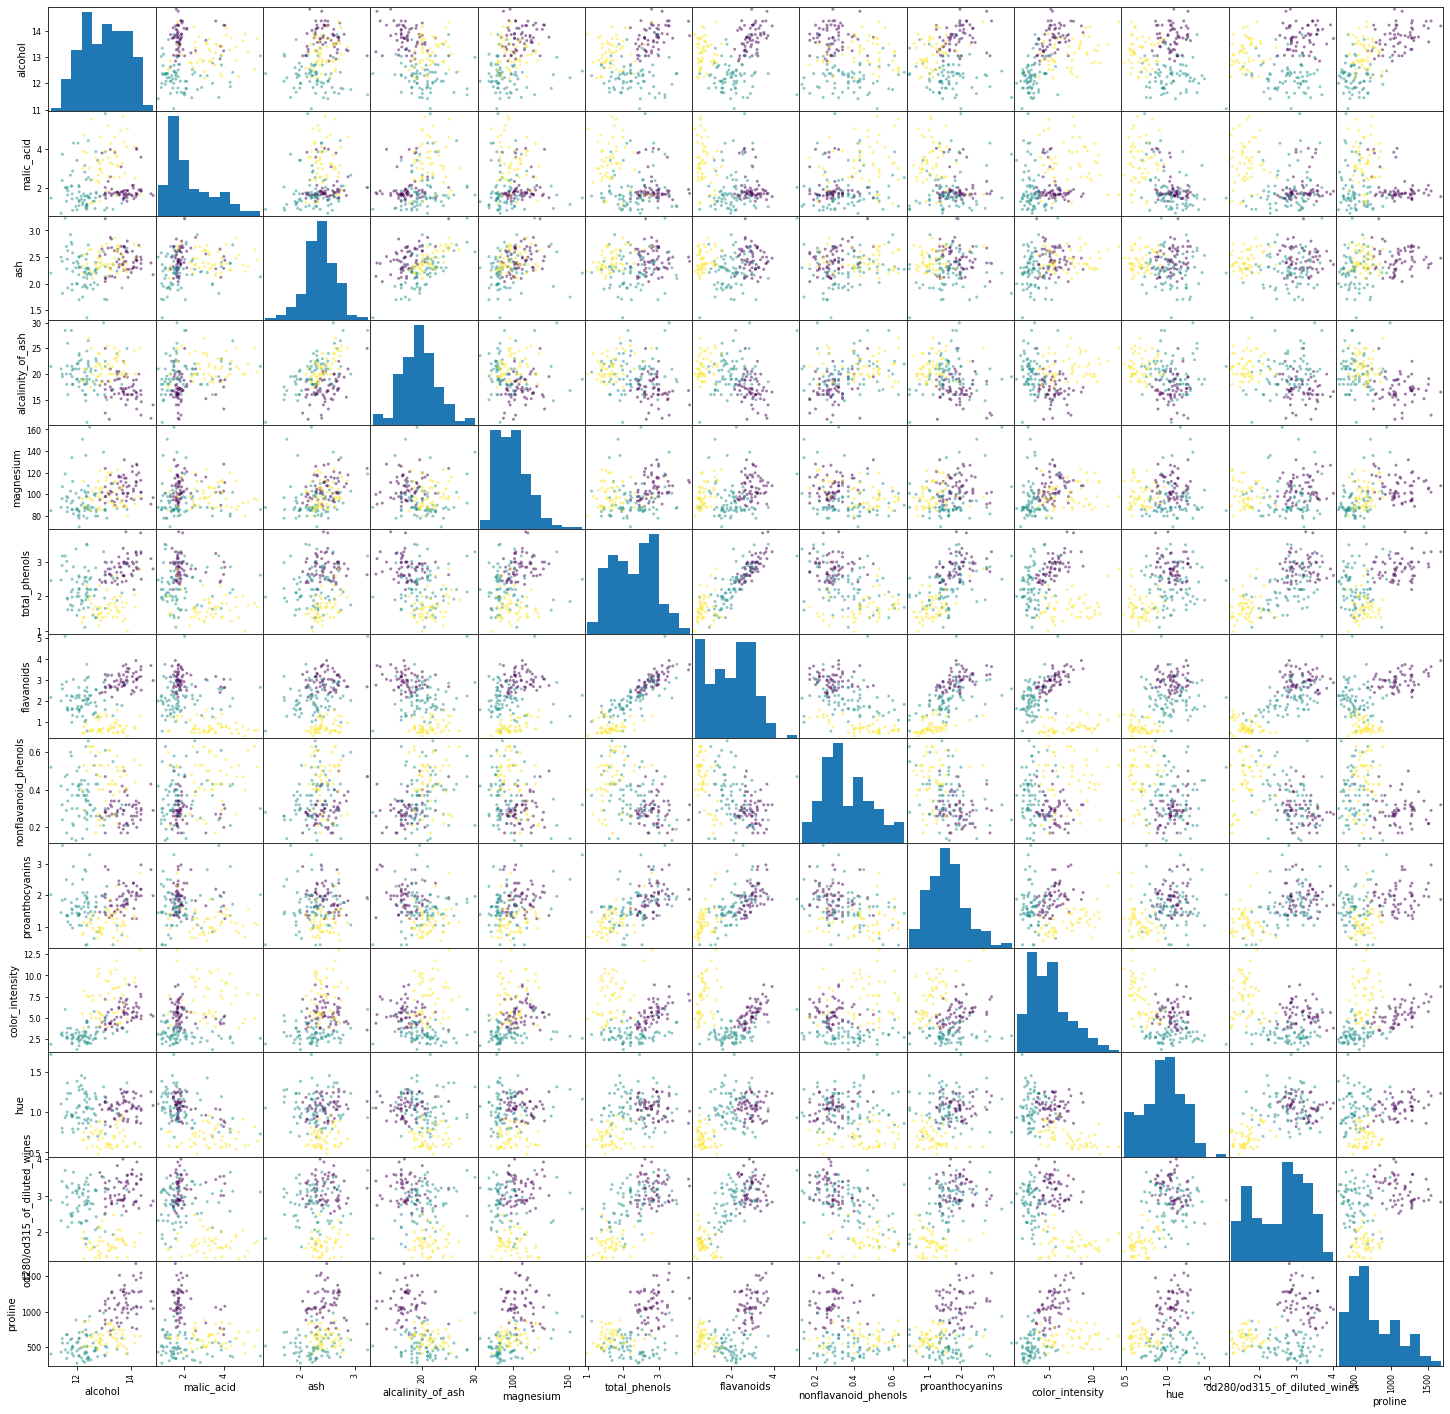

In [57]:
scat_mtrx = pd.plotting.scatter_matrix(ds_wine, c=wine.target, figsize=(25, 25))

Для дальнейшей работы, выбраал пару alcochol и color_intensity

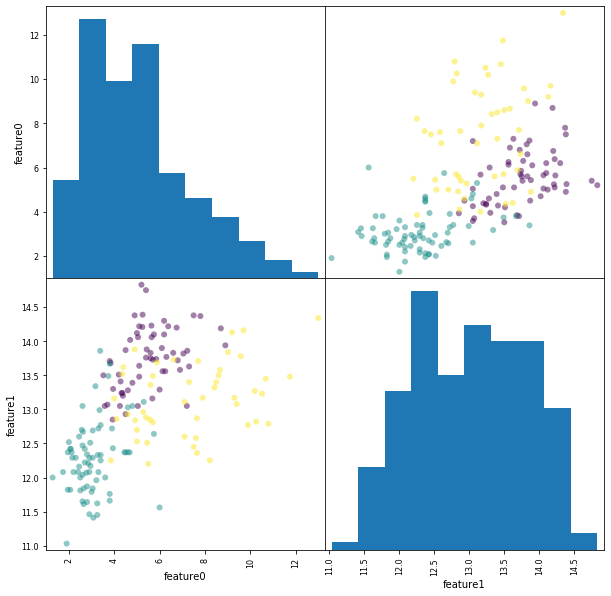

In [58]:
ds_wine_simple = pd.DataFrame()
ds_wine_simple['feature0'] = ds_wine['color_intensity']
ds_wine_simple['feature1'] = ds_wine['alcohol']
scat_mtrx = pd.plotting.scatter_matrix(ds_wine_simple, c=wine.target ,figsize=(10, 10),
                                      marker='o')

### 2.
Разбейте данные на тренировочный и тестовый датасеты (при разбиении используйте параметр random_state=17 для воспроизводимости результатов) и постройте модель на двух выбранных признаках. Используя встроенную функцию *score()*, проверьте точность работы модели. Если score() меньше 0.88..., выберите по графику другие два признака и постройте модель на них. Укажите номера признаков, которые вы использовали (помните, что индекс массива признаков начинается с 0).

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [60]:
nb = GaussianNB()

x_train, x_test, y_train, y_test = train_test_split(ds_wine_simple, 
                                                    wine.target, random_state=17)
nb_model = nb.fit(x_train, y_train)
nb_predictions = nb_model.predict(x_test)
nb_predictions
accuracy = nb_model.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8222222222222222


У модели GaussianNB есть метод predict_proba(test), который возвращает вероятности принадлежности каждого объекта из *test* к каждому из классов. 

In [61]:
nb.predict_proba(x_test)

array([[8.08248195e-04, 9.95242341e-01, 3.94941096e-03],
       [5.84408249e-04, 9.96440404e-01, 2.97518728e-03],
       [8.57893973e-03, 9.77628843e-01, 1.37922177e-02],
       [8.73949822e-01, 1.59613568e-03, 1.24454043e-01],
       [2.58294593e-03, 4.17364463e-12, 9.97417054e-01],
       [1.71571530e-01, 7.18805560e-01, 1.09622910e-01],
       [8.99923106e-01, 6.83009766e-05, 1.00008593e-01],
       [1.78584382e-05, 9.99543819e-01, 4.38322158e-04],
       [5.48452742e-02, 6.91257819e-01, 2.53896906e-01],
       [9.21054482e-01, 3.59723273e-04, 7.85857946e-02],
       [1.91282610e-03, 8.17657084e-11, 9.98087174e-01],
       [9.27530063e-01, 2.26376839e-03, 7.02061684e-02],
       [6.67501496e-04, 9.96148310e-01, 3.18418850e-03],
       [1.19798177e-04, 9.98263323e-01, 1.61687900e-03],
       [5.17185756e-04, 2.48819465e-12, 9.99482814e-01],
       [5.69278554e-03, 2.98460970e-11, 9.94307214e-01],
       [1.35516647e-01, 6.50539173e-01, 2.13944180e-01],
       [2.94601115e-04, 9.97663

### 3.
Еще раз обучите модель на признаках с номерами 11, 12, предварительно снова разбив данные на тренировочные и тестовые (с random_state=17). С помощью функции predict_proba() посмотрите, какие вероятности были вычислены для каждого из классов, и выведите эти вероятности для объекта x_test[0].

Выбранные столбцы: od280/od315_of_diluted_wines & proline
Accuracy: 0.9777777777777777


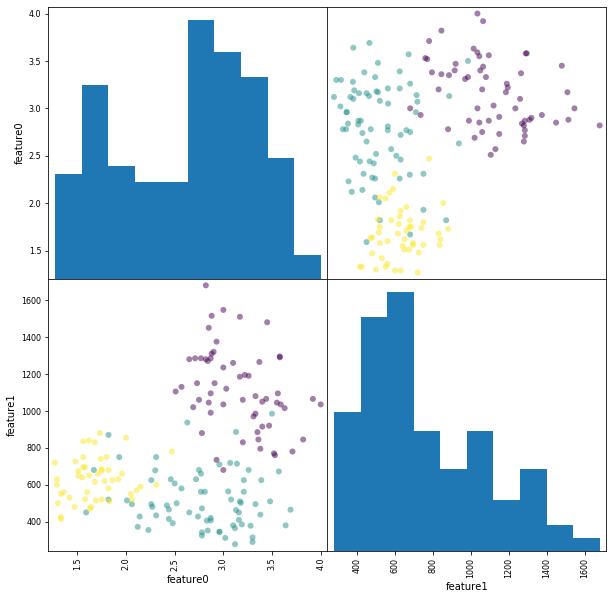

In [62]:
ds_wine_simple = pd.DataFrame()
ds_wine_simple['feature0'] = ds_wine.iloc[:, 11]
ds_wine_simple['feature1'] = ds_wine.iloc[:, 12]
print('Выбранные столбцы:', wine.feature_names[11], '&', wine.feature_names[12])
scat_mtrx = pd.plotting.scatter_matrix(ds_wine_simple, c=wine.target, figsize=(10, 10),
                                       marker='o')
x_train, x_test, y_train, y_test = train_test_split(ds_wine_simple, 
                                                    wine.target, random_state=17)
nb_model = nb.fit(x_train, y_train)
nb_predictions = nb_model.predict(x_test)
nb_predictions
accuracy = nb_model.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

In [65]:
proba = nb_model.predict_proba([x_test.iloc[0]])
print('Полученная вероятность:', proba[0,0], proba[0,1], proba[0,2])

Полученная вероятность: 0.004556430297023824 0.9953314065098726 0.00011216319310257843
